In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df =pd.read_csv('loan-prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
x =df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y =df['Loan_Status']

In [5]:
x.shape

(614, 11)

In [6]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

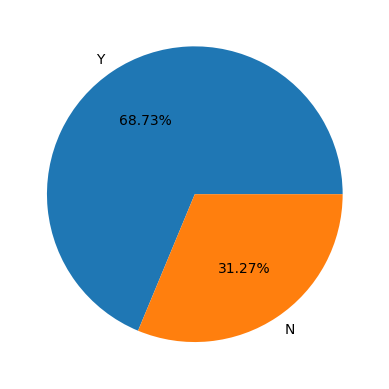

In [7]:
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

In [8]:
x.count()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
dtype: int64

In [9]:
x.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
x = df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = df['Loan_Status']

In [12]:
x.shape

(480, 11)

In [13]:
x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
x_new = pd.get_dummies(x)

In [15]:
x_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [16]:
x_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True


In [17]:
x_new.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_0                  bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Graduate            bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

### Build the risk modeler

In [18]:
from sklearn.naive_bayes import GaussianNB


In [19]:
risk_modeler = GaussianNB()

In [20]:
risk_modeler.fit(x_new,y)

GaussianNB()

In [21]:
new = x_new.iloc[[67],:]

In [22]:
new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
85,2366,2531.0,136.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False


In [23]:
risk_modeler.predict_proba(new)

array([[0.01974009, 0.98025991]])

In [24]:
risk_modeler.classes_

array(['N', 'Y'], dtype='<U1')

In [25]:
new = x_new.iloc[[167,305,238,4,226],:]
risk_modeler.predict_proba(new)

array([[0.16987411, 0.83012589],
       [0.00668451, 0.99331549],
       [0.997924  , 0.002076  ],
       [0.05729625, 0.94270375],
       [0.12864698, 0.87135302]])

In [26]:
###

In [27]:
from sklearn.datasets import make_classification

In [28]:
data = make_classification(n_samples=1000, n_features=10,
                          n_classes=3,random_state=0,n_informative=3)

In [29]:
data[0].shape

(1000, 10)

In [30]:
data[1].shape

(1000,)

In [31]:
df = pd.DataFrame(data=data[0])
df

,0,1,2,3,4,5,6,7,8,9
0,0.819779,-1.209914,-0.722380,1.003950,-0.979971,0.863045,-1.305264,1.931509,-0.218147,1.052379
1,-0.079849,-1.332187,0.174223,0.362889,0.542220,0.609956,-1.394318,3.261326,0.436210,-0.284100
2,0.448398,1.467524,1.626891,1.487932,-0.093216,1.365850,0.904803,0.199811,1.066764,-1.343350
3,-1.188151,-0.976029,1.366291,-0.137204,-0.480942,0.711755,2.501837,-1.601705,1.693881,-2.300939
4,0.322170,-0.299055,0.229044,0.110691,-0.250154,1.725162,2.018810,-1.081597,1.487460,-2.044366
...,...,...,...,...,...,...,...,...,...,...
995,0.857132,-1.592681,-0.571533,0.205845,-2.089823,1.485980,1.145587,-1.272726,0.497331,0.070588
996,1.345835,0.449556,0.476607,0.363212,-0.031968,-0.933691,1.807801,-1.349057,1.105564,-1.679314
997,1.201039,-0.106445,0.640789,-2.166358,-0.549258,2.683211,1.355574,-0.975544,0.860544,-1.058197
998,-0.004350,1.735186,2.102210,-0.815035,0.324706,0.302458,0.870952,-1.102547,0.261084,-0.676430


In [32]:
df['class']= data[1]
df

,0,1,2,3,4,5,6,7,8,9,class
0,0.819779,-1.209914,-0.722380,1.003950,-0.979971,0.863045,-1.305264,1.931509,-0.218147,1.052379,0
1,-0.079849,-1.332187,0.174223,0.362889,0.542220,0.609956,-1.394318,3.261326,0.436210,-0.284100,0
2,0.448398,1.467524,1.626891,1.487932,-0.093216,1.365850,0.904803,0.199811,1.066764,-1.343350,2
3,-1.188151,-0.976029,1.366291,-0.137204,-0.480942,0.711755,2.501837,-1.601705,1.693881,-2.300939,2
4,0.322170,-0.299055,0.229044,0.110691,-0.250154,1.725162,2.018810,-1.081597,1.487460,-2.044366,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.857132,-1.592681,-0.571533,0.205845,-2.089823,1.485980,1.145587,-1.272726,0.497331,0.070588,1
996,1.345835,0.449556,0.476607,0.363212,-0.031968,-0.933691,1.807801,-1.349057,1.105564,-1.679314,2
997,1.201039,-0.106445,0.640789,-2.166358,-0.549258,2.683211,1.355574,-0.975544,0.860544,-1.058197,2
998,-0.004350,1.735186,2.102210,-0.815035,0.324706,0.302458,0.870952,-1.102547,0.261084,-0.676430,2


### Regression Dataset

In [33]:
from sklearn.datasets import make_regression

In [34]:
reg_data = make_regression(n_samples=500,n_features=5)


In [35]:
reg_data[0].shape

(500, 5)

In [36]:
reg_data[1].shape

(500,)

In [37]:
reg_data[1]

array([-194.19801198,  116.39221106,   -6.82857419,   15.94383796,
         55.90040574,  -54.44552297,    0.60724698,   49.18181561,
       -197.9811998 , -140.87531387,  -48.53746436,  -64.96066009,
        -93.15372608,  100.48073004,   55.94542567, -191.75943049,
        122.10674485,  277.60459466,   53.98821924,  -84.38391004,
        -47.96729286,  163.62672966,  105.49180673,  149.6598802 ,
        -61.72966491,   46.31851221,   61.14119013, -171.81756627,
        -34.06290939, -123.17486869,   46.50074646,   -4.81049251,
        -73.00116965,  127.10450841,  -62.11716489,  -39.33730335,
        257.84203031,   56.92685754,   57.09931348,   69.82243528,
        105.31482597,   15.23407099,  -53.12030204, -186.79557474,
         68.98304524,   34.38326154,  191.65048364,    6.55592592,
       -130.64132601,  162.42189947,  -63.54700292,   87.79304456,
        213.81931056, -143.23971755,  -25.02142663,  157.91770825,
         89.3891009 ,  -85.6708714 ,  -38.54614187,  258.15854

### Creating clustering datasets

In [38]:
from sklearn.datasets import make_blobs

In [39]:
data_clu = make_blobs(n_samples=700,n_features=7)

In [40]:
data_clu[0].shape

(700, 7)

In [41]:
data_clu[1].shape

(700,)

In [42]:
data_clu[1]

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0,

### Generate data with Standard Normal Distribution 

In [43]:
from scipy.stats import norm

In [44]:
samples = norm.rvs(loc=0, scale=1, size=100)

In [45]:
samples

array([-0.31243378, -1.34269619,  1.23640481, -1.4565965 ,  1.31493068,
        1.13651958, -0.84908618,  1.61472344, -0.16439265,  0.58719665,
       -0.34758939,  0.67335747, -0.52036868,  1.01740132, -0.04137692,
       -1.05749954,  0.27342887, -0.27829108, -1.19480851,  0.7318046 ,
       -1.01122375, -0.69179041,  0.07008206,  0.91598409, -1.42658422,
        0.87462489, -0.21484948,  0.33086471, -0.84852254, -1.91215958,
       -1.25279913,  0.43465586,  0.99521595,  0.53509411, -0.35356299,
       -0.58088332,  0.0459105 , -0.17739192,  1.19548846,  0.37727981,
        0.53281747, -0.15865652,  0.07265387,  0.50037453, -1.41623695,
       -0.69175655,  0.13068445, -2.36522797,  3.11934542, -0.62050267,
       -1.22894324,  0.00551921, -0.87846855,  0.08386032, -0.34043823,
        0.64543187, -0.19050982,  0.30086101, -0.87949202,  0.08046696,
       -0.42647262,  0.19370167, -0.12387621, -0.58155407,  0.88931672,
        0.90995689, -2.00251394, -0.40445655,  1.09950732, -2.87

In [46]:
samples.mean()

-0.09988595354392907

In [47]:
samples.std()


0.927406046866866

In [48]:
(samples)

array([-0.31243378, -1.34269619,  1.23640481, -1.4565965 ,  1.31493068,
        1.13651958, -0.84908618,  1.61472344, -0.16439265,  0.58719665,
       -0.34758939,  0.67335747, -0.52036868,  1.01740132, -0.04137692,
       -1.05749954,  0.27342887, -0.27829108, -1.19480851,  0.7318046 ,
       -1.01122375, -0.69179041,  0.07008206,  0.91598409, -1.42658422,
        0.87462489, -0.21484948,  0.33086471, -0.84852254, -1.91215958,
       -1.25279913,  0.43465586,  0.99521595,  0.53509411, -0.35356299,
       -0.58088332,  0.0459105 , -0.17739192,  1.19548846,  0.37727981,
        0.53281747, -0.15865652,  0.07265387,  0.50037453, -1.41623695,
       -0.69175655,  0.13068445, -2.36522797,  3.11934542, -0.62050267,
       -1.22894324,  0.00551921, -0.87846855,  0.08386032, -0.34043823,
        0.64543187, -0.19050982,  0.30086101, -0.87949202,  0.08046696,
       -0.42647262,  0.19370167, -0.12387621, -0.58155407,  0.88931672,
        0.90995689, -2.00251394, -0.40445655,  1.09950732, -2.87

In [49]:
### practic

In [50]:
samples.min(),samples.max()

(-2.8725073737888067, 3.1193454156725178)

In [51]:
x1=[1,-1,2,-2,3,-3,4,-4,5,-5,6,-6]

In [52]:
np.mean(x1)

0.0

<Axes: ylabel='Density'>

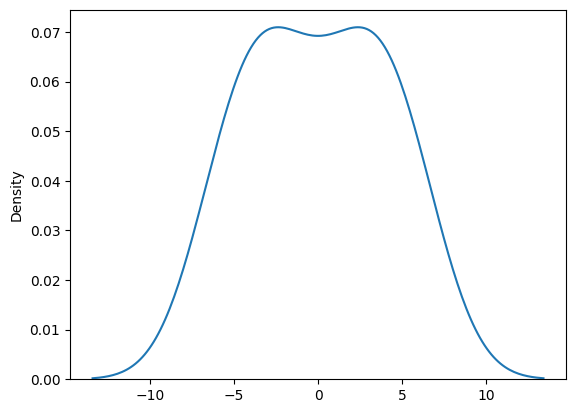

In [53]:
sns.kdeplot(x1)

### Generate data with Standard Normal Distribution

In [54]:
from scipy.stats import poisson

In [55]:
mean_customers_per_hours = 5

In [56]:
number_of_customers = poisson.rvs(mean_customers_per_hours,size=1)

In [57]:
print(number_of_customers)

[2]


In [58]:
custs = []
for n in range(100):
    number_of_customers = poisson.rvs(mean_customers_per_hours,size=1)
    custs.append(number_of_customers[0])
    

In [59]:
sum(custs)/len(custs)

5.05

<Axes: ylabel='Density'>

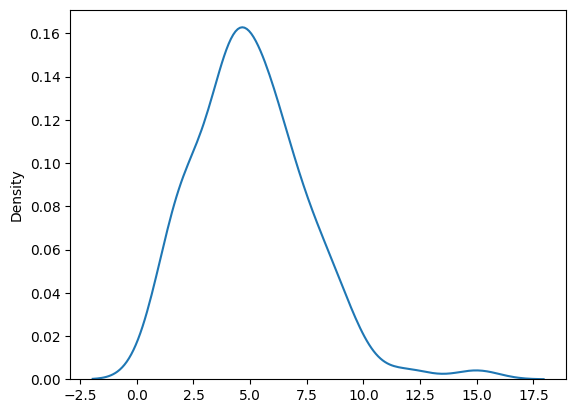

In [60]:
sns.kdeplot(custs)